In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
def effective_potential(phi, T, lamb=0.1, mu2=-100**2, E=0.01, A=0.1):
    """
    Simple effective potential with thermal corrections.
    V(φ,T) = λφ⁴/4 + μ²φ²/2 + AT²φ² - ETφ³
    """
    # Standard potential terms
    V_quartic = lamb * phi**4 / 4        # Quartic term
    V_mass = mu2 * phi**2 / 2            # Mass term
    V_thermal = A * T**2 * phi**2        # Thermal mass
    V_cubic = -E * T * phi**3            # Cubic term (barrier)
    
    # Total potential
    V = V_quartic + V_mass + V_thermal + V_cubic
    
    return V

def plot_simple_potentials():
    """Plot potentials at different temperatures to directly visualize phase transitions."""
    # Field values
    phi = np.linspace(0, 300, 1000)
    
    # Define multiple parameter sets with increasingly extreme values
    parameter_sets = [
        # Set 1: Standard values
        {'lamb': 0.1, 'mu2': -100**2, 'E': 0.01, 'A': 0.1},
        
        # Set 2: Very strong cubic term
        {'lamb': 0.01, 'mu2': -100**2, 'E': 0.5, 'A': 0.1},
        
        # Set 3: Extreme values
        {'lamb': 0.001, 'mu2': -100**2, 'E': 2.0, 'A': 0.05}
    ]
    
    # Create figure with subplots
    fig, axes = plt.subplots(len(parameter_sets), 1, figsize=(10, 4*len(parameter_sets)))
    
    # Ensure axes is always a list
    if len(parameter_sets) == 1:
        axes = [axes]
    
    # For each parameter set
    for i, params in enumerate(axes):
        param_set = parameter_sets[i]
        ax = axes[i]
        
        # Plot potential at different temperatures
        temperatures = [50, 100, 150, 200]
        
        for T in temperatures:
            # Calculate potential
            V = effective_potential(phi, T, **param_set)
            
            # Normalize for better visibility
            V_min = np.min(V)
            V_norm = V - V_min
            
            # Plot
            ax.plot(phi, V_norm, label=f'T = {T} GeV')
            
        # Set title and labels
        ax.set_title(f"Set {i+1}: λ = {param_set['lamb']}, E = {param_set['E']}, " + 
                   f"μ² = {param_set['mu2']}, A = {param_set['A']}")
        ax.set_xlabel('φ (GeV)')
        ax.set_ylabel('V(φ,T) - V_min')
        ax.set_ylim(0, 5e6)
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.savefig('basic_potentials.png', dpi=300)
    plt.show()

# Test with extremely simple parameters focused on T=100-150 range
def focused_test():
    """Focused test at temperatures where transition is likely to occur."""
    # Field values
    phi = np.linspace(0, 300, 1000)
    
    # Extremely strong cubic term, weak quartic (guaranteed first-order)
    params = {'lamb': 0.001, 'mu2': -100**2, 'E': 2.0, 'A': 0.05}
    
    # Focus on temperatures where transition is likely
    temperatures = [110, 120, 130, 140, 150]
    
    plt.figure(figsize=(12, 8))
    
    for T in temperatures:
        # Calculate potential
        V = effective_potential(phi, T, **params)
        
        # Normalize for better visibility
        V_min = np.min(V)
        V_norm = V - V_min
        
        # Limit the y-axis to better see the minima
        V_clamped = np.minimum(V_norm, 2e6)
        
        # Plot
        plt.plot(phi, V_clamped, label=f'T = {T} GeV')
    
    # Set title and labels
    plt.title(f"Extreme Parameters: λ = {params['lamb']}, E = {params['E']}, " + 
            f"μ² = {params['mu2']}, A = {params['A']}")
    plt.xlabel('φ (GeV)')
    plt.ylabel('V(φ,T) - V_min (clamped)')
    plt.ylim(0, 2e6)
    plt.legend()
    plt.grid(True)
    
    plt.savefig('focused_potentials.png', dpi=300)
    plt.show()

# Study sphaleron bound with directly calculated v(T)/T
def study_vev_T_ratio():
    """Directly study v(T)/T by finding minima at each temperature."""
    # Field values for finding minima
    phi = np.linspace(0, 300, 1000)
    
    # Use extreme parameters for guaranteed first-order transition
    params = {'lamb': 0.001, 'mu2': -100**2, 'E': 2.0, 'A': 0.05}
    
    # Temperature range
    temperatures = np.linspace(50, 250, 50)
    
    # Store VEVs and v(T)/T ratios
    vevs = []
    ratios = []
    
    for T in temperatures:
        # Calculate potential
        V = effective_potential(phi, T, **params)
        
        # Find the minimum (excluding phi near 0)
        # Only consider phi > 10 to ignore the symmetric minimum
        valid_indices = np.where(phi > 10)[0]
        if len(valid_indices) > 0:
            min_idx = valid_indices[np.argmin(V[valid_indices])]
            vev = phi[min_idx]
            ratio = vev / T
        else:
            vev = 0
            ratio = 0
        
        vevs.append(vev)
        ratios.append(ratio)
    
    # Plot results
    plt.figure(figsize=(12, 8))
    
    plt.plot(temperatures, vevs, 'b-', label='v(T)')
    plt.plot(temperatures, ratios, 'r--', label='v(T)/T')
    
    # Highlight the sphaleron bound
    plt.axhline(y=1, color='black', linestyle=':', label='Sphaleron bound: v/T = 1')
    
    # Annotate approximate critical temperature
    transition_idx = np.argmax(np.diff(vevs))
    T_c = temperatures[transition_idx]
    v_c = vevs[transition_idx]
    ratio_c = ratios[transition_idx]
    
    plt.axvline(x=T_c, color='green', linestyle='--', label=f'T_c ≈ {T_c:.1f} GeV')
    plt.scatter(T_c, v_c, color='green', s=100)
    plt.annotate(f'v(T_c) ≈ {v_c:.1f} GeV\nv(T_c)/T_c ≈ {ratio_c:.2f}',
               xy=(T_c, v_c), xytext=(T_c+10, v_c+20),
               arrowprops=dict(arrowstyle='->'))
    
    plt.xlabel('Temperature (GeV)')
    plt.ylabel('Field Value / Ratio')
    plt.title(f'VEV and v(T)/T Ratio vs Temperature\nParameters: λ={params["lamb"]}, E={params["E"]}')
    plt.legend()
    plt.grid(True)
    
    plt.savefig('vev_ratio.png', dpi=300)
    plt.show()

Plotting basic effective potentials with various parameter sets...


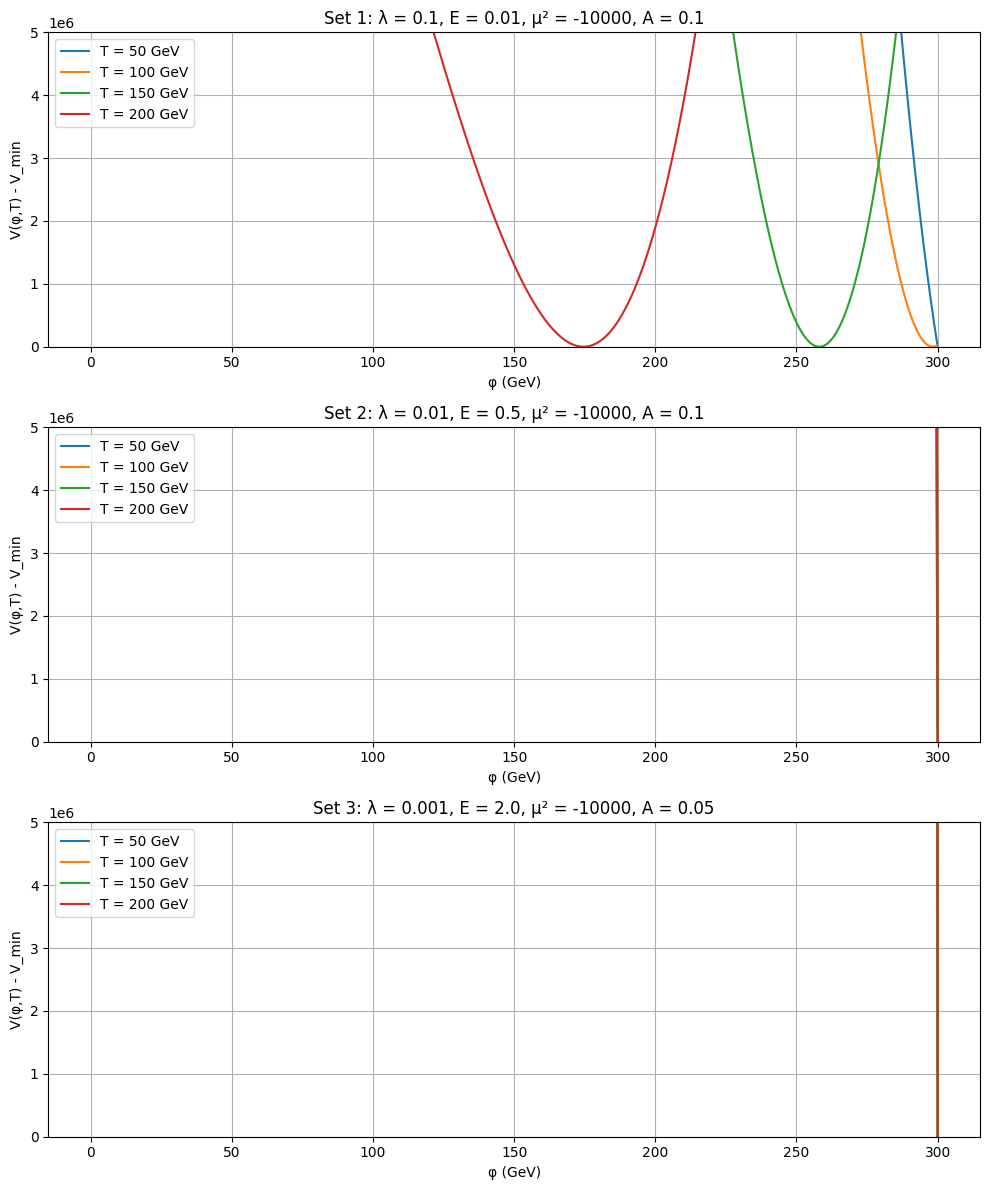


Focusing on potential shapes near the critical temperature...


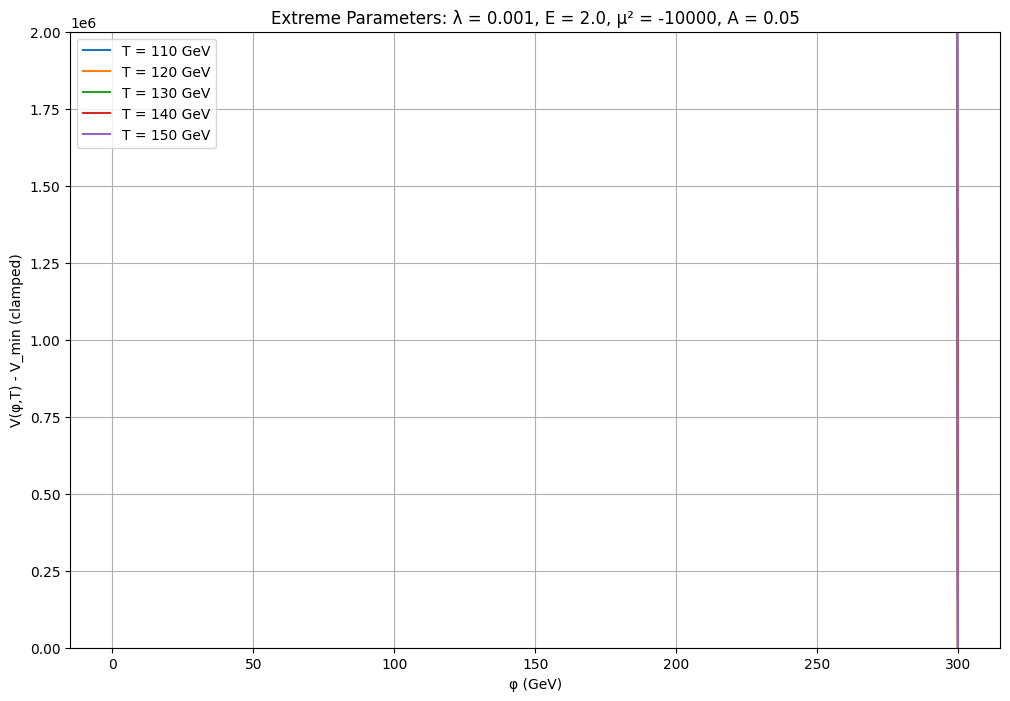


Studying the sphaleron bound (v(T)/T) directly...


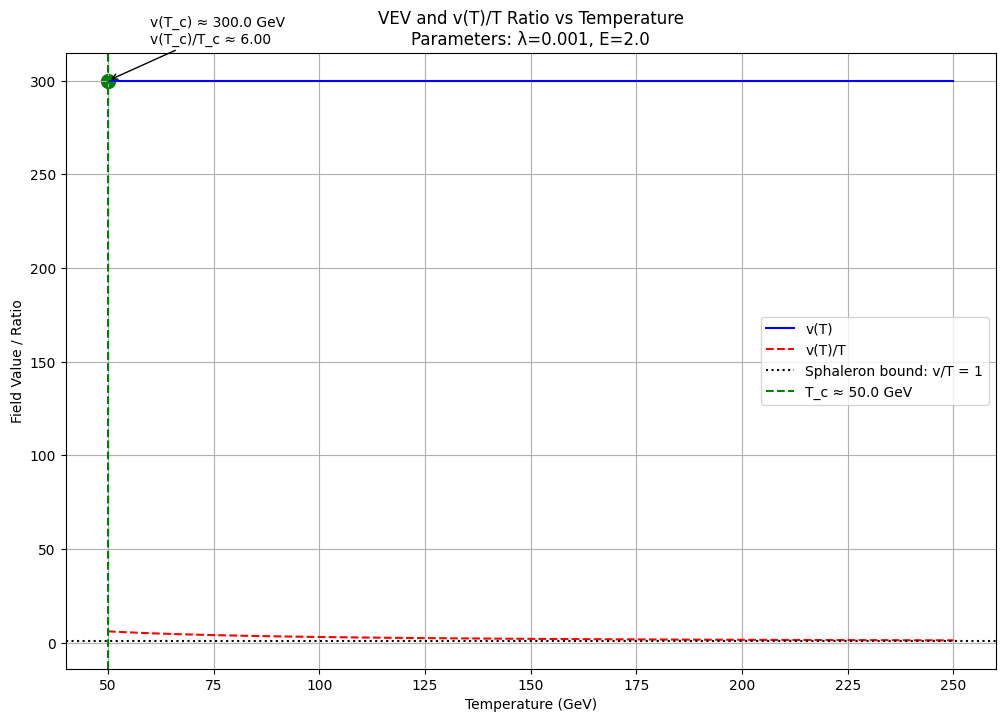


Done! Check the generated plots to visualize the phase transition.


In [5]:
if __name__ == "__main__":
    print("Plotting basic effective potentials with various parameter sets...")
    plot_simple_potentials()
    
    print("\nFocusing on potential shapes near the critical temperature...")
    focused_test()
    
    print("\nStudying the sphaleron bound (v(T)/T) directly...")
    study_vev_T_ratio()
    
    print("\nDone! Check the generated plots to visualize the phase transition.")